# Preprocessing Dataset for use in machine learning algorithm

#### Objective of this kernel:
* to further explore the data
* To clean the out put the Dataset to be fed into the various machine algorithms

Lets import the required libraries

In [2]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


# Input data files are available in the "../output/" directory.
import os
for dirname, _, filenames in os.walk('./output/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# Any results you write to the current directory are saved as output.


./output/processed_data.csv


## Reading the data set

In [3]:
df = pd.read_csv('./output/processed_data.csv')
df

,Age,Gender,wassce grade,level,current CGPA,number of siblings,access to a laptop or internet,study group,time spent on independent studies,grades
0,23 - 27 years,Male,16 - 20,L 400,2.9 - 2.5,More than 3,Yes,Yes,More than 2 hours,Second class lower
1,23 - 27 years,Male,6 - 9,L 400,1.9 - 1.5,Less than 3,Yes,Yes,More than 2 hours,Pass
2,23 - 27 years,Male,10 - 15,L 400,3.5 - 3.0,Exactly 3,Yes,Yes,Less than 2 hours,Second class upper
3,23 - 27 years,Female,10 - 15,L 400,2.9 - 2.5,Exactly 3,Yes,Yes,More than 2 hours,Second class lower
4,23 - 27 years,Female,10 - 15,L 400,2.9 - 2.5,Less than 3,Yes,Yes,More than 2 hours,Second class lower
...,...,...,...,...,...,...,...,...,...,...
233,18 - 22 years,Male,6 - 9,L 400,4.0 - 3.6,Less than 3,Yes,Yes,More than 2 hours,First class
234,18 - 22 years,Male,6 - 9,L 300,Below 1.5,More than 3,Maybe,No,More than 2 hours,Fail
235,More than 32 years,Female,Above 30,L 300,Below 1.5,More than 3,No,Yes,Less than 2 hours,Fail
236,18 - 22 years,Female,16 - 20,L 300,3.5 - 3.0,More than 3,Yes,Yes,More than 2 hours,Second class upper


## Feature selection

## We want to find the correlation between columns of our Dataset to select good features
* we find the corelation between the several columns
* Those with a positive correlation with the column current cgpa will be selected as features

In [4]:
# Using pandas.factorize() method which can get the numeric representation of an array by identifying distinct values.
df.apply(lambda x: x.factorize()[0]).corr()

,Age,Gender,wassce grade,level,current CGPA,number of siblings,access to a laptop or internet,study group,time spent on independent studies,grades
Age,1.000000,0.075500,0.055084,0.045286,0.058849,0.013596,0.034322,-0.006430,-0.133305,0.058849
Gender,0.075500,1.000000,-0.010815,-0.065241,-0.009519,0.086967,0.043328,-0.046163,-0.080981,-0.009519
wassce grade,0.055084,-0.010815,1.000000,-0.045168,0.090045,0.033258,0.118444,0.011084,0.044506,0.090045
level,0.045286,-0.065241,-0.045168,1.000000,0.030472,0.004244,0.005634,0.101142,0.047145,0.030472
current CGPA,0.058849,-0.009519,0.090045,0.030472,1.000000,-0.110264,0.053859,-0.032374,0.112886,1.000000
number of siblings,0.013596,0.086967,0.033258,0.004244,-0.110264,1.000000,-0.100201,0.015744,0.029441,-0.110264
access to a laptop or internet,0.034322,0.043328,0.118444,0.005634,0.053859,-0.100201,1.000000,0.076877,0.124810,0.053859
study group,-0.006430,-0.046163,0.011084,0.101142,-0.032374,0.015744,0.076877,1.000000,0.036791,-0.032374
time spent on independent studies,-0.133305,-0.080981,0.044506,0.047145,0.112886,0.029441,0.124810,0.036791,1.000000,0.112886
grades,0.058849,-0.009519,0.090045,0.030472,1.000000,-0.110264,0.053859,-0.032374,0.112886,1.000000


<AxesSubplot:>

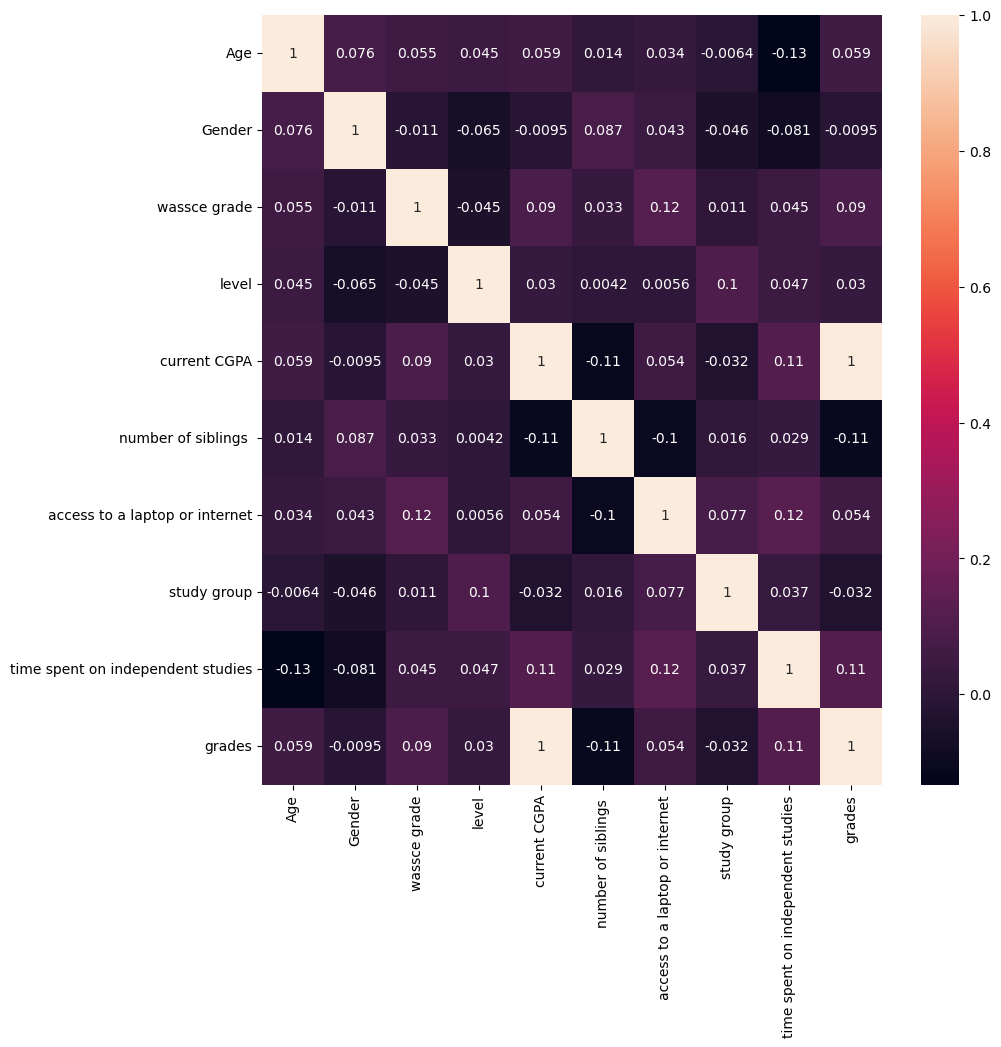

In [5]:
# we make a simple visualization of correlations
plt.figure(figsize=(10,10))
sns.heatmap(df.apply(lambda x: x.factorize()[0]).corr(),annot=True,cbar=True)

#### Observations:
* The correlation between current CGPA and grade is high so can not be used as a Feature for our machine learning algorithm
* The correlation between current CGPA and number of siblings has a high  negative value so can not be used as a Feature for our machine learning algorithm
###  WE drop the grade column since it is redandant data 
###  WE drop the number of siblings column since it is redandant data

In [6]:
df= df.drop('grades',axis=1)
df= df.drop('number of siblings ',axis=1)

### We select our features
* Our independent variable will be labeled x
* Our independent variable will be labeled Y

In [7]:
y= df[["current CGPA"]].values
x =df[["Age","Gender","wassce grade","level","access to a laptop or internet","study group","time spent on independent studies"]].values

## We are going to write our results to an output file named processed_data.csv

In [8]:
df.to_csv("./output/cleaned_data.csv",index_label=False)